455    1
380    1
492    0
55     1
243    0
      ..
695    0
128    1
636    0
222    0
496    1
Name: survived, Length: 534, dtype: int64


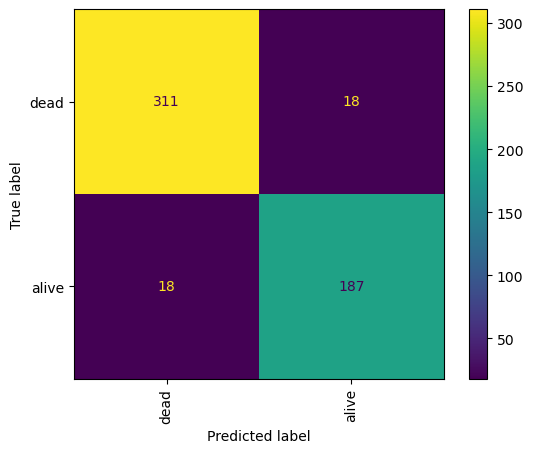

In [1]:
# Fit a K-Nearest Neighbors classifier to your 
# training sample and transform 
# (i.e. make predictions on the training sample)
import warnings
warnings.filterwarnings("ignore")
import acquire 
import prepare
# Tabular data friends:
import pandas as pd
import numpy as np

# Data viz:
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn stuff:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Data acquisition
from pydataset import data

df = acquire.get_titanic_data()
df = prepare.prep_titanic(df)
df = df.drop(columns ='age')
train ,validate, test = prepare.split_data(df, 'survived')
train

X_train = train.iloc[:, 1:10]
y_train = train.survived


X_validate = validate.iloc[:, 1:10]
y_validate = validate.survived

X_test = test.iloc[:, 1:10]
y_test = test.survived

knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_train)


y_pred1 = knn.predict_proba(X_train)

knn.classes_

confusion_matrix(y_train, y_pred)


pd.crosstab(y_train, y_pred)

the_matrix = plot_confusion_matrix(knn, X = X_train, y_true = y_train, 
                       xticks_rotation = 'vertical', display_labels=['dead','alive'])

knn.score(X_train,y_train)

# print(classification_report(y_train,y_pred))
# print(y_train.value_counts())
# print(y_pred)
print(y_train)

col_0       0    1
survived          
0         311   18
1          18  187
col_0       0    1
survived          
0         286   43
1          73  132
col_0       0    1
survived          
0         287   42
1          95  110
      train  validate   k  difference
0  0.932584  0.691011   1    0.241573
1  0.782772  0.707865  10    0.074906
2  0.743446  0.662921  20    0.080524


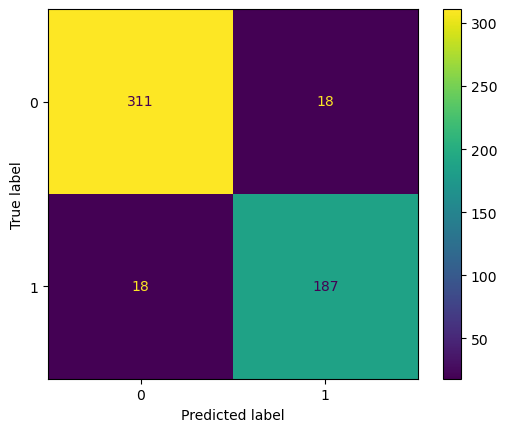

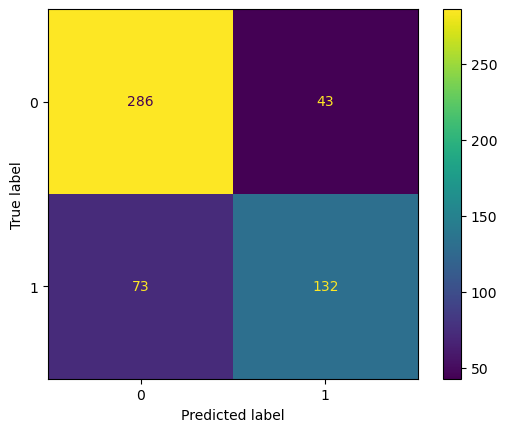

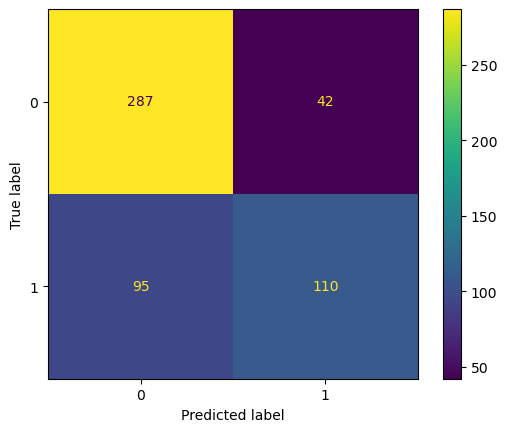

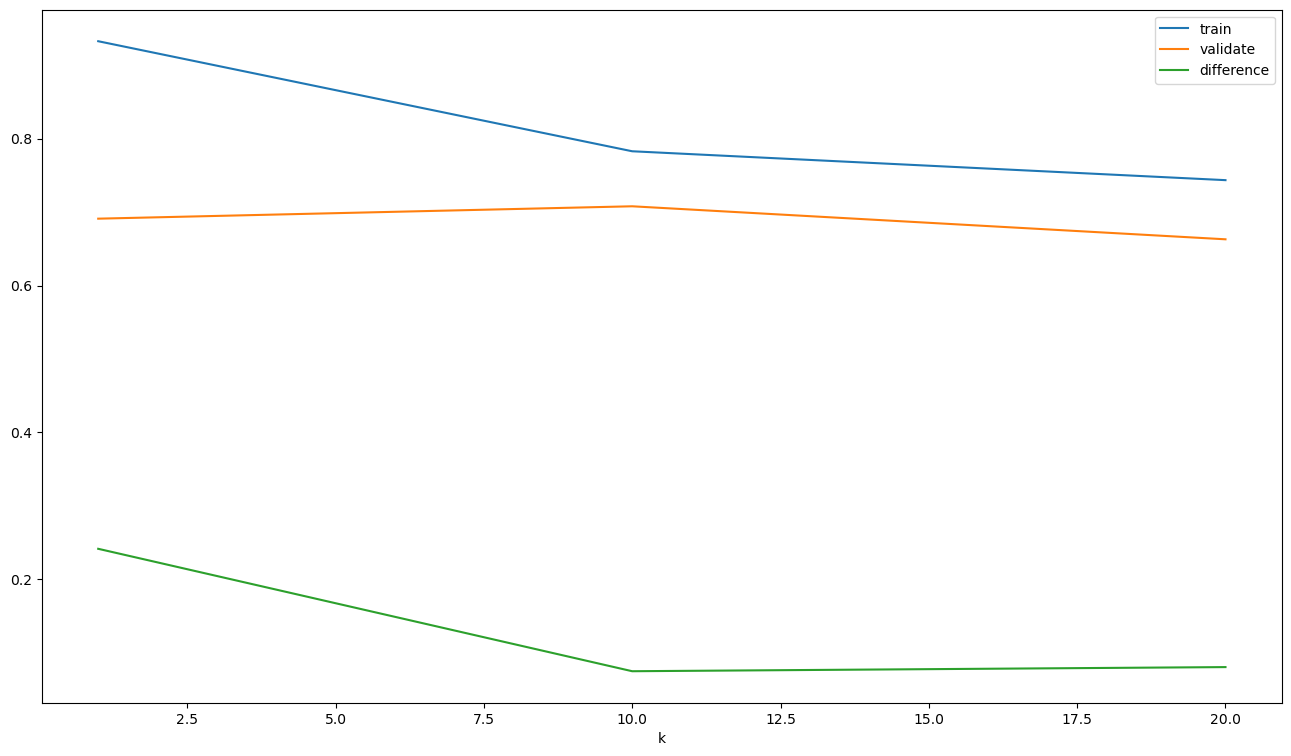

In [2]:
def k_predictions(k = 1):

    X_train = train.iloc[:, 1:10]
    y_train = train.survived


    X_validate = validate.iloc[:, 1:10]
    y_validate = validate.survived

    X_test = test.iloc[:, 1:10]
    y_test = test.survived

    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    
    plot_confusion_matrix(knn, X_train, y_train)
    print(pd.crosstab(y_train,y_pred))
    
    return knn.score(X_train, y_train), knn.score(X_validate, y_validate)
    
    
the_k = [1,10,20]
the_dict = {}
train_list = []
validate_list = []
for i in the_k:
    train_predict, validate_predict = k_predictions(i)
    train_list.append(train_predict)
    validate_list.append(validate_predict)
    
    
    
    
the_dict['train'] = train_list
the_dict['validate'] = validate_list
the_dict['k'] = the_k

the_df = pd.DataFrame(the_dict)
the_df['difference'] = the_df.train - the_df.validate

the_df.set_index('k').plot(figsize = (16, 9))
print(the_df)


        train  validate   k the_weight the_algorithm  difference
0    0.932584  0.691011   1    uniform          auto    0.241573
1    0.932584  0.691011   1    uniform     ball_tree    0.241573
2    0.932584  0.691011   1    uniform       kd_tree    0.241573
3    0.932584  0.691011   1    uniform         brute    0.241573
4    0.932584  0.691011   1   distance          auto    0.241573
5    0.932584  0.691011   1   distance     ball_tree    0.241573
6    0.932584  0.691011   1   distance       kd_tree    0.241573
7    0.932584  0.691011   1   distance         brute    0.241573
8    0.863296  0.724719   2    uniform          auto    0.138577
9    0.863296  0.724719   2    uniform     ball_tree    0.138577
10   0.863296  0.724719   2    uniform       kd_tree    0.138577
11   0.863296  0.724719   2    uniform         brute    0.138577
12   0.943820  0.696629   2   distance          auto    0.247191
13   0.943820  0.696629   2   distance     ball_tree    0.247191
14   0.943820  0.696629  

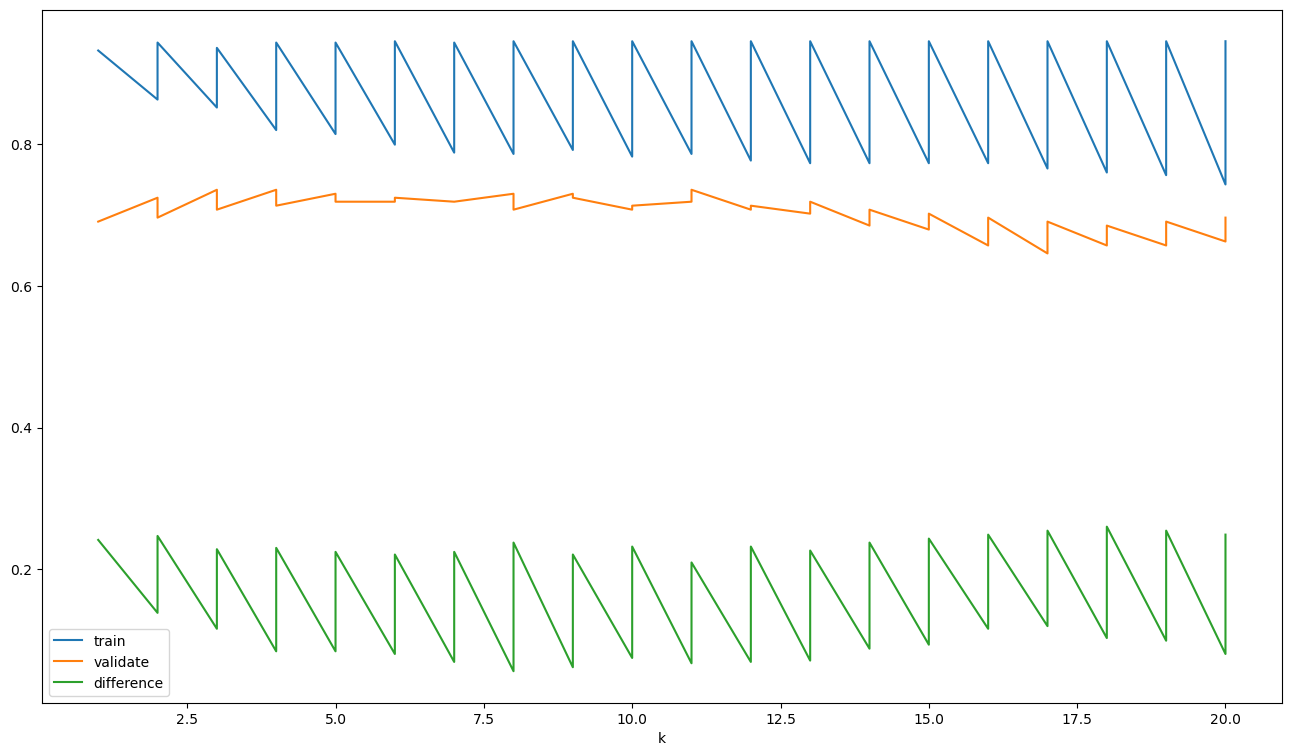

In [3]:
def k_predictions(k = 1, weight = 'uniform',algorithm='auto'):

    X_train = train.iloc[:, 1:10]
    y_train = train.survived


    X_validate = validate.iloc[:, 1:10]
    y_validate = validate.survived

    X_test = test.iloc[:, 1:10]
    y_test = test.survived

    knn = KNeighborsClassifier(n_neighbors=k, weights=weight)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    

    
    
    return knn.score(X_train, y_train), knn.score(X_validate, y_validate)
    
    
the_k = []
the_dict = {}
train_list = []
validate_list = []
the_weight_list = []
the_algorithm_list = []
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights =['uniform', 'distance']


for i in range(1,21):
    for k in weights:
        for h in algorithm:   
            if k == 'uniform':
                train_predict, validate_predict = k_predictions(i,k,h)
                train_list.append(train_predict)
                validate_list.append(validate_predict)
                the_k.append(i)
                the_weight_list.append(k)
                the_algorithm_list.append(h)
            else: 
                train_predict, validate_predict = k_predictions(i,k,h)
                train_list.append(train_predict)
                validate_list.append(validate_predict)
                the_k.append(i)
                the_weight_list.append(k)
                the_algorithm_list.append(h)
    
    
    
    
the_dict['train'] = train_list
the_dict['validate'] = validate_list
the_dict['k'] = the_k
the_dict['the_weight'] = the_weight_list
the_dict['the_algorithm'] = the_algorithm_list

the_df = pd.DataFrame(the_dict)
the_df['difference'] = the_df.train - the_df.validate

the_df.set_index('k').plot(figsize = (16, 9))
print(the_df)
